In [1]:
# read in the data
import pandas as pd
import numpy as np

# Read in "fashion-mnist_train"
fashion_train = pd.read_csv('fashion-mnist_train.csv')

# Read in "fashion-mnist_test"
fashion_test = pd.read_csv('fashion-mnist_test.csv')

fashion_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Show a single variable from the dataset

* Just to get a handle on how the data is organized, let's look at a single variable from the dataset in image form

Picture of:  Pullover


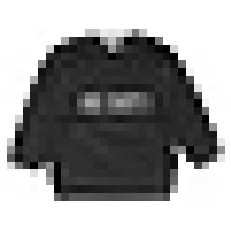

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

clothing_types = {
0: 'T-shirt/top',
1: 'Trouser',
2: 'Pullover',
3: 'Dress',
4: 'Coat',
5: 'Sandal',
6: 'Shirt',
7: 'Sneaker',
8: 'Bag',
9: 'Ankle boot',
}

some_clothing = fashion_train.iloc[0]

# get the value of the first element in the series
label = some_clothing.get('label')
some_clothing = some_clothing.drop('label', axis=0)
# remove the "label" row
some_clothing_image = some_clothing.values.reshape(28, 28)

print("Picture of: ", clothing_types[label])

plt.imshow(some_clothing_image, cmap="binary")
plt.axis("off")
plt.show()

# Use SGD Classifier

* This uses sgd classifier in order to train a binary classifier on whether or not an image is a pullover

## Tasks Accomplished here:
  * Use SGDClassifier
  * Use One-Hot-Encoding
    * When I create the variable fashion_train_pullovers, I am creating a one-hot-encoding of whether or not the element is a pullover. 1 for pullover, 0 for not a pullover.

In [39]:
from sklearn.linear_model import SGDClassifier

# equivalent of y_train
fashion_train_labels = fashion_train['label']
fashion_train_data = fashion_train.drop('label', axis=1)
fashion_train_data = fashion_train_data.values.tolist()

# fashion_train_labels, equivalent of y-train_5
fashion_train_pullovers = (fashion_train_labels == 2)
# fashion_train_pullovers
sgd_clf = SGDClassifier(random_state=42)
# x-train, y-train_5
sgd_clf.fit(fashion_train_data, fashion_train_pullovers)


SGDClassifier(random_state=42)

# Implement Cross-Validation
  * This uses Cross-validation to determine the effectiveness of the classifier we made above

## Tasks Accomplished here:
  * Use k-fold Cross Validation (cross_val_score)
  * Use StratifiedKFold cross validation

In [4]:
from sklearn.model_selection import cross_val_score


def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())


scores_by_cross_val = cross_val_score(sgd_clf, fashion_train_data,
                         fashion_train_pullovers, cv=3, scoring="accuracy")
display_scores(scores_by_cross_val)

Scores: [0.94075 0.93685 0.93935]
Mean: 0.9389833333333333
Standard deviation: 0.0016131404843417246


In [5]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(fashion_train_data, fashion_train_pullovers):
    clone_clf = clone(sgd_clf)
    X_train_folds = np.array(fashion_train_data)[train_index.astype(int)]
    y_train_folds = np.array(fashion_train_pullovers)[train_index.astype(int)]
    X_test_fold = np.array(fashion_train_data)[test_index.astype(int)]
    y_test_fold = np.array(fashion_train_pullovers)[test_index.astype(int)]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print("Correctness of this fold: ",n_correct / len(y_pred))


Correctness of this fold:  0.9241
Correctness of this fold:  0.92835
Correctness of this fold:  0.939


# Use an OvR Classifier

  * Ensemble of methods (OvR Classifier)
  * Run an OvR classifier

THIS CELL BELOW TAKES 33 minutes to run on my laptop, so I would not suggest running it yourself unless you want to wait for it

In [6]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

ovr_clf = OneVsRestClassifier(SVC())
print("one vs rest")
# x-train, y-train
ovr_clf.fit(fashion_train_data, fashion_train_labels.values.tolist())
print("this is the second line")
ovr_clf.predict([some_clothing])
print("the end")

one vs rest
this is the second line
the end


In [11]:
# First test a single item which we know is a pullover
ovr_clf.predict([some_clothing])

some_clothing = fashion_train.iloc[50]

# get the value of the first element in the series
label = some_clothing.get('label')
some_clothing = some_clothing.drop('label', axis=0)


print("actual label: ", label)
print("predicted label: ", ovr_clf.predict([some_clothing]))

actual label:  5
predicted label:  [5]


# Generate an ROC curve

In [14]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(sgd_clf, fashion_train_data, fashion_train_pullovers, cv=3,
                             method="decision_function")
fpr, tpr, thresholds = roc_curve(
    fashion_train_pullovers, y_scores)


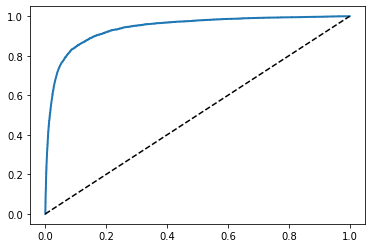

In [15]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
    [...]  # Add axis labels and grid


plot_roc_curve(fpr, tpr)
plt.show()


# Make a full data pipeline

In [10]:
from sklearn.linear_model import SGDClassifier

# equivalent of y_train
y_train = fashion_train['label'].values.tolist()
# equivalent of x_train
x_train = fashion_train.drop('label', axis=1).values.tolist()

# equivalent of y_test
y_test = fashion_test['label'].values.tolist()
# equivalent of x_test
x_test = fashion_test.drop('label', axis=1).values.tolist()

In [ ]:
# Run the model
sgd_clf = SGDClassifier(random_state=42)
# x-train, y-train_5
sgd_clf.fit(x_train, y_train)


## Pipeline itself

* There is no preprocessing of the data to do once it is split into x and y, so all we do is add the classifier

In [52]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[('check_type_of_clothing', SGDClassifier(random_state=42))])


In [53]:
# Fit the pipeline to the training set
clothing_model = pipeline.fit(x_train, y_train)

### Score the model

In [54]:
from sklearn.metrics import r2_score
# Predict on the test set and print the accuracy level
predictions = clothing_model.predict(x_test)
print(r2_score(y_test, predictions))

0.702


So from this, we can see that our model was about 70% effective at predicting what type of clothing it was! That's not so bad. if we chose randomly, we would have about a 10% chance to get it right, so a very large improvement on randomly selecting!

### Save the model

Now lets save the model to a file, so that we can use it later if we like

In [55]:
import joblib
joblib.dump(clothing_model, './clothing_model.pkl')

['./clothing_model.pkl']

### Call the model via the file

So now if we wanted to use this model in the future, we could load from that .pkl file

In [56]:
rf_model = joblib.load('./clothing_model.pkl')
new_prediction = rf_model.predict(x_test)
print(r2_score(y_test, new_prediction))

0.702


# Pipeline for Binary Classifier

That last pipeline was pretty boring, since the data was already set up perfectly to allow for model creation. There is a one-hot encoding needed for making a Binary Classifier, so that's what we are going to do here.

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, fashion_train.drop(
            ['label'], axis=1).columns.tolist()),
    ])

binary_pipeline = Pipeline(steps=[
  ('prep the data', preprocessor),
  ('check_type_of_clothing', SGDClassifier(random_state=42))])

### Train the pipeline

* This trains on whether or not the clothing piece in question is a pullover

In [47]:
y_train_2 = (fashion_train['label'] == 2).astype(int)
y_test_2 = (fashion_test['label'] == 2).astype(int)

In [14]:
binary_pipeline.fit(fashion_train.drop(
    'label', axis=1), y_train_2.values.tolist())


Pipeline(steps=[('prep the data',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['pixel1', 'pixel2', 'pixel3',
                                                   'pixel4', 'pixel5', 'pixel6',
                                                   'pixel7', 'pixel8', 'pixel9',
                                                   'pixel10', 'pixel11',
                                                   'pixel12', 'pixel13',
                                                   'pixel14', 'pixel15',
                                                   'pixel16', 'pixel17',
                                          

### Score the model

In [49]:
from sklearn.metrics import r2_score
# Predict on the test set and print the accuracy level
predictions = binary_pipeline.predict(fashion_test.drop(
    'label', axis=1))
predictions = predictions.astype(int)
print(r2_score(y_test_2, predictions))


type of predictions:  <class 'numpy.ndarray'> length:  10000
type of y_test:  <class 'pandas.core.series.Series'> length:  10000
0.2544444444444445


### Save the model

In [51]:
import joblib
joblib.dump(clothing_model, './clothing_model_binary.pkl')


['./clothing_model_binary.pkl']

In [ ]:
rf_model = joblib.load('./clothing_model_binary.pkl')
new_prediction_binary = binary_pipeline.predict(x_test)
print(r2_score(y_test, new_prediction))
